<a href="https://colab.research.google.com/github/ManasaCherukupally1/Manasa_INFO5731_Spring2023/blob/main/SciBERT_GPT-2_Model_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#loading the extracted contributions dataset
import pandas as pd
test_df = pd.read_csv("final_contributions.csv")
test_df=test_df[test_df['label'] == 1]
#Replacing the value with its shortform
test_df['conference'] = test_df['conference'].replace('Empirical Methods in Natural Language Processing', 'EMNLP')

In [2]:
print(test_df)

                                                     text  label    year  \
0       In addition tothe ﬁve comparison methods used ...    1.0  2013.0   
2                                 We thus use this method    1.0  2013.0   
3       In this paper, we present a system that combin...    1.0  2013.0   
4       In addition, the selec-tion of classifiers, fe...    1.0  2013.0   
6       We also compare to HTK,a ﬁxed-structure HMM wi...    1.0  2013.0   
...                                                   ...    ...     ...   
385214  We propose using an intermediate representatio...    1.0  2022.0   
385215  It is suggested that such a\nvolume is enough ...    1.0  2022.0   
385216  In contrast,\nlong paragraph inputs describe t...    1.0  2022.0   
385221  We compare models in terms of ofﬂine\nNLU perf...    1.0  2022.0   
385224  In addition to the distilled baseline, we also...    1.0  2022.0   

       conference  
0           CoNLL  
2           CoNLL  
3           CoNLL  
4      

In [3]:
import pandas as pd
import pandas as pd

#Cleaning the Data
condition = test_df['text'].str.len() >= 50
test_df = test_df[condition]
#print(test_df)

#Data Sampling to get rows of all Conferences and all years
selected_rows = pd.DataFrame()
for con in ['EMNLP','JMLR','CoNLL']:

  # Filtering the DataFrame based on a specific column value
  for year in test_df['year'].unique():
    filtered_df = test_df[(test_df['conference'] == con) & (test_df['year'] == year)]
    if len(filtered_df) >= 100:
      filtered_df = filtered_df.sample(n=100, random_state=42)
      selected_rows = pd.concat([selected_rows,filtered_df])
    else:
      print("There are fewer than 3000 rows with text length >= 50.")


selected_rows=selected_rows.reset_index(drop=True)
# Display
print(selected_rows)

                                                   text  label    year  \
0     We present an approach based on neu-\nral netw...    1.0  2013.0   
1     Our contributions:\nWe present TMI, a bootstra...    1.0  2013.0   
2     We evaluate our pro-\nposed summarization appr...    1.0  2013.0   
3     We use the PageRank-based approach proposed\nb...    1.0  2013.0   
4     We compared the\napproach to two classic, simp...    1.0  2013.0   
...                                                 ...    ...     ...   
2995  We then train DistilBERT hate speech classific...    1.0  2022.0   
2996  We have presented a new approach to unsuper-vi...    1.0  2022.0   
2997  Our researchquestion is what level of structur...    1.0  2022.0   
2998  We have proposed amethod of estimating syntact...    1.0  2022.0   
2999  Wemake our implementation of A publicly availa...    1.0  2022.0   

     conference  
0         EMNLP  
1         EMNLP  
2         EMNLP  
3         EMNLP  
4         EMNLP  
...

In [4]:
selected_rows.head()

,text,label,year,conference
0,We present an approach based on neu-\nral netw...,1.0,2013.0,EMNLP
1,"Our contributions:\nWe present TMI, a bootstra...",1.0,2013.0,EMNLP
2,We evaluate our pro-\nposed summarization appr...,1.0,2013.0,EMNLP
3,We use the PageRank-based approach proposed\nb...,1.0,2013.0,EMNLP
4,"We compared the\napproach to two classic, simp...",1.0,2013.0,EMNLP


In [5]:
selected_rows.shape

(3000, 4)

In [6]:
#Renaming the column
selected_rows.rename(columns={'text': 'Text'}, inplace=True)


# **Data Cleaning**

# Remove URLs,HTML,Tags and Mentions

In [7]:
import re

def remove_url_tags_mentions(input_text):
    # Check if input_text is a string
    if not isinstance(input_text, str):
        return ""

    # Clean URLs.
    url_removed_text = re.compile(r'https?://\S+|www\.\S+').sub(r'', input_text)
    # Clean HTML tags.
    html_tag_removed_text = re.compile(r'<.*?>').sub(r'', url_removed_text)
    # Clear mentions.
    final_cleaned_text = re.sub(r'@(\w+)', '', html_tag_removed_text)
    return final_cleaned_text.lower()





# Remove punctuations and AsCII Characters

In [8]:
def remove_punctuations(text):
    cleaned_text = re.sub(r"[^\w\s\d]", "", text)
    cleaned_text = cleaned_text.encode('ascii', 'ignore').decode('utf-8')
    return cleaned_text





# Lemmatization

In [9]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(input_text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(input_text)
    lemmatized_words = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    cleaned_text = " ".join(lemmatized_words)
    return cleaned_text




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Remove Stop Words and Numbers

In [10]:
import nltk
from nltk.corpus import stopwords

# Download necessary NLTK packages
packages_to_be_downloaded = ['punkt', 'wordnet', 'omw-1.4', 'stopwords']
for package in packages_to_be_downloaded:
    nltk.download(package)

# Set up English stopwords
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def remove_stopwords_numerics(input_text):
    word_tokens = word_tokenize(input_text)
    filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
    filtered_words = [word for word in filtered_words if not word.isdigit()]
    return ' '.join(filtered_words)




In [12]:
selected_rows['Text'] = selected_rows['Text'].apply(remove_url_tags_mentions)
selected_rows['Text'] = selected_rows['Text'].apply(remove_punctuations)
selected_rows['Text'] = selected_rows['Text'].apply(lemmatize_text)
selected_rows['Text'] = selected_rows['Text'].apply(remove_stopwords_numerics)
selected_rows['Text'] = selected_rows['Text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) != 2]))


# Exploratory Data analysis of The Extracted Contributions

In [13]:
df_visualize=selected_rows.copy()
print(df_visualize)

                                                   Text  label    year  \
0     present approach based neu ral network model a...    1.0  2013.0   
1     contribution present tmi bootstrap ping system...    1.0  2013.0   
2     evaluate pro posed summarization approach tac ...    1.0  2013.0   
3              use pagerankbased approach proposed yang    1.0  2013.0   
4     compared approach two classic simple method fe...    1.0  2013.0   
...                                                 ...    ...     ...   
2995  train distilbert hate speech classification mo...    1.0  2022.0   
2996  presented new approach unsupervised cognate id...    1.0  2022.0   
2997  researchquestion level structural informationi...    1.0  2022.0   
2998  proposed amethod estimating syntactic predicta...    1.0  2022.0   
2999  wemake implementation publicly available8in ho...    1.0  2022.0   

     conference  
0         EMNLP  
1         EMNLP  
2         EMNLP  
3         EMNLP  
4         EMNLP  
...

**Box-Plot and KDE**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


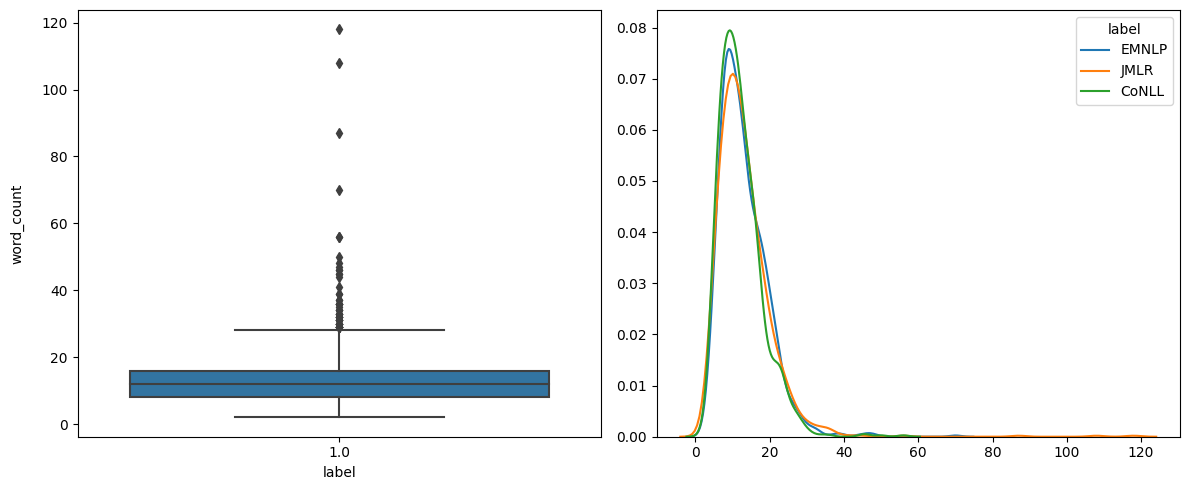

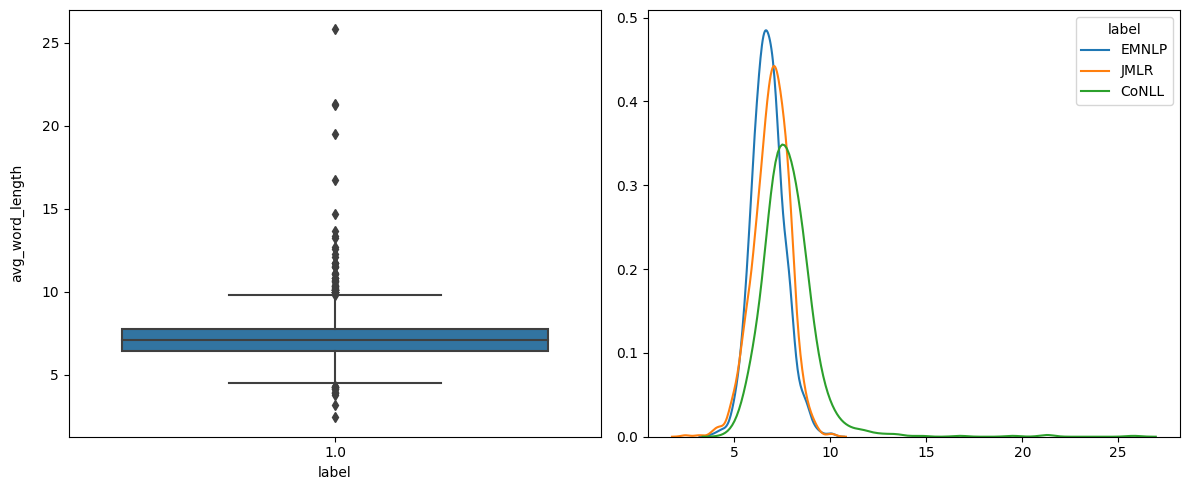

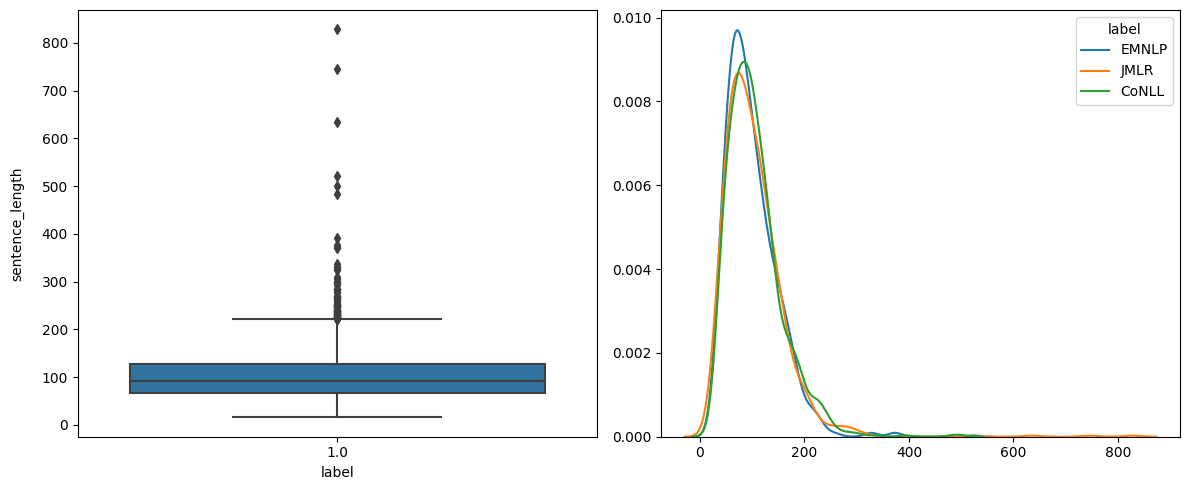

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')

# Tokenize Function
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenize function
df_visualize['cleaned_tokens'] = df_visualize['Text'].apply(tokenize)

# Calculate sentence length
df_visualize['sentence_length'] = df_visualize['Text'].apply(len)

# Basic statistics
df_visualize['word_count'] = df_visualize['cleaned_tokens'].apply(len)
df_visualize['unique_word_count'] = df_visualize['cleaned_tokens'].apply(lambda x: len(set(x)))
df_visualize['avg_word_length'] = df_visualize['cleaned_tokens'].apply(lambda x: sum(len(word) for word in x) / len(x))

# Function to visualize boxplot and KDE
def visualize(col):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=col, x='label', data=df_visualize)
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1, 2, 2)
    for rating in df_visualize['conference'].unique():
        sns.kdeplot(df_visualize[df_visualize['conference'] == rating][col], label=rating)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='label')

    plt.tight_layout()
    plt.show()

# Apply visualize function to 'word_count', 'avg_word_length', and 'sentence_length'
visualize('word_count')
visualize('avg_word_length')
visualize('sentence_length')

**Word-cloud For each Conference**

EMNLP


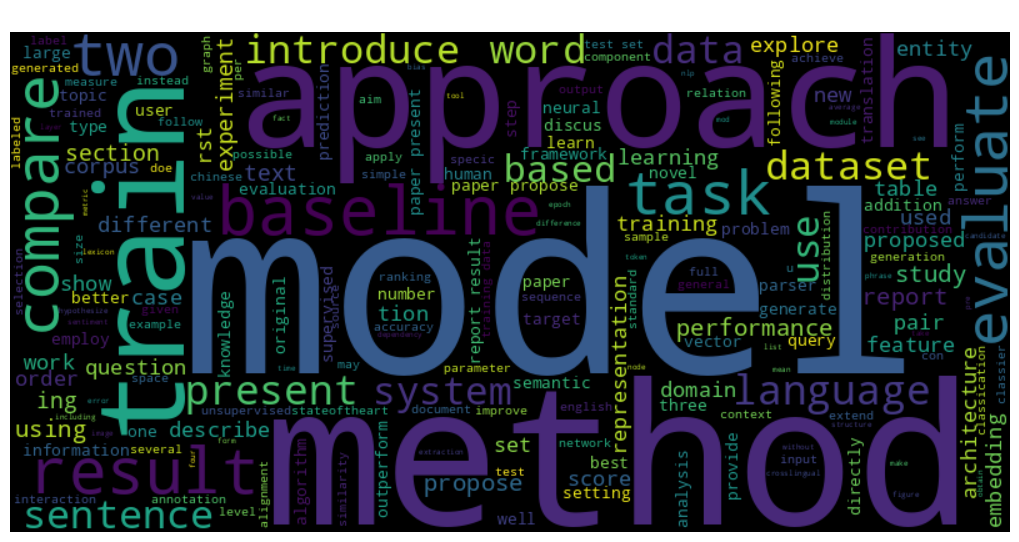

JMLR


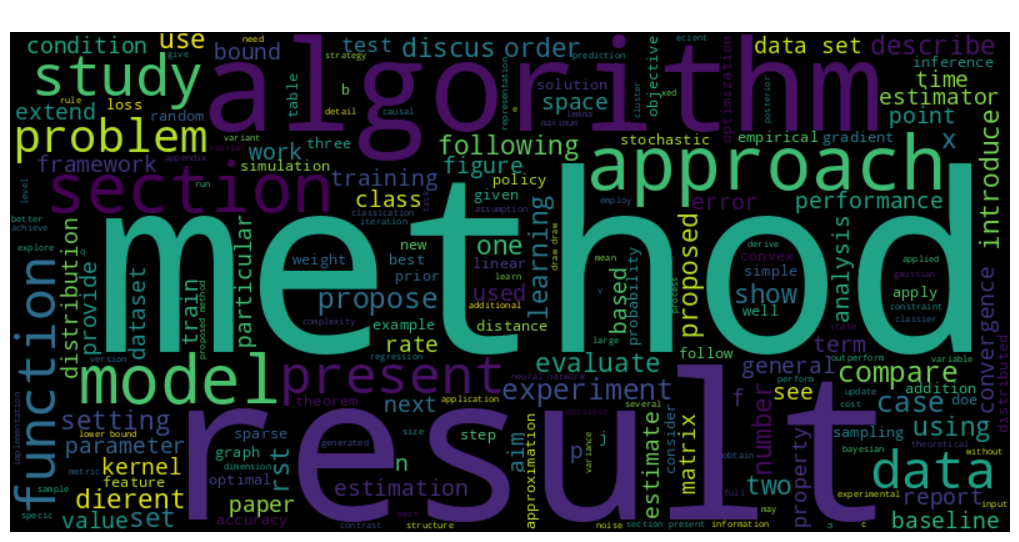

CoNLL


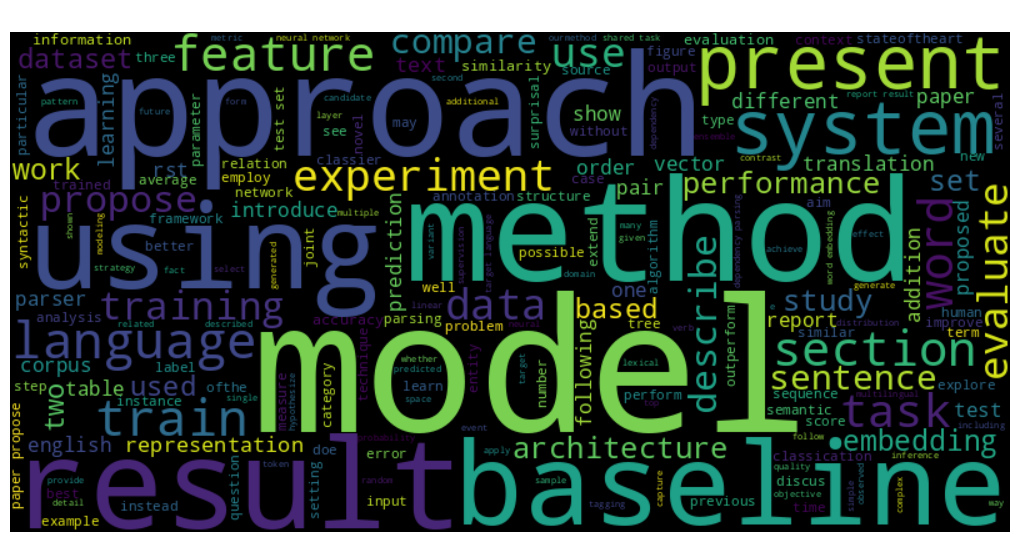

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(df,con):
  print(con)
    # Concatenate all text into a single string
  text_combined = ' '.join(df[df['conference'] == con]['Text'].astype(str))

  # Create the WordCloud object
  wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_combined)

  # Display the WordCloud

  plt.figure(figsize=(10, 8))
  plt.title('Word Cloud from Text Column of conference'+ con, color='white')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  # Set title color
  plt.tight_layout(pad=0)
  plt.show()

for con in selected_rows['conference'].unique():
  create_wordcloud(df_visualize,con)

In [16]:
df_visualize=df_visualize[['Text','year','conference']]

**Bar-Plot for POS-Tagging**

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


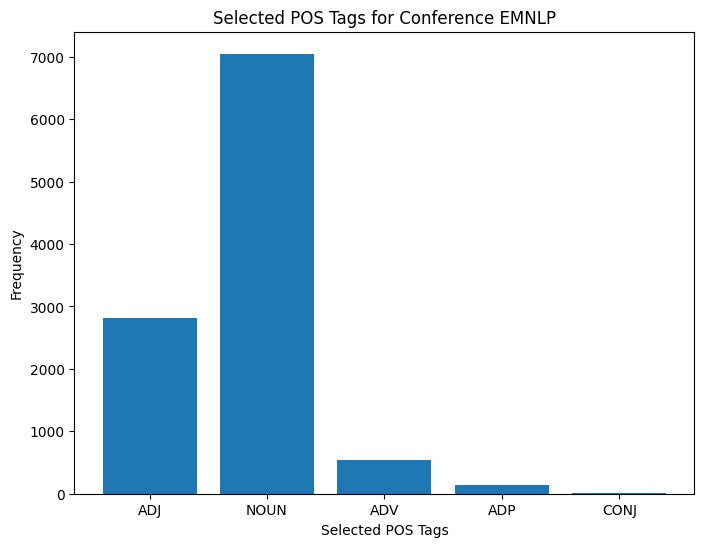

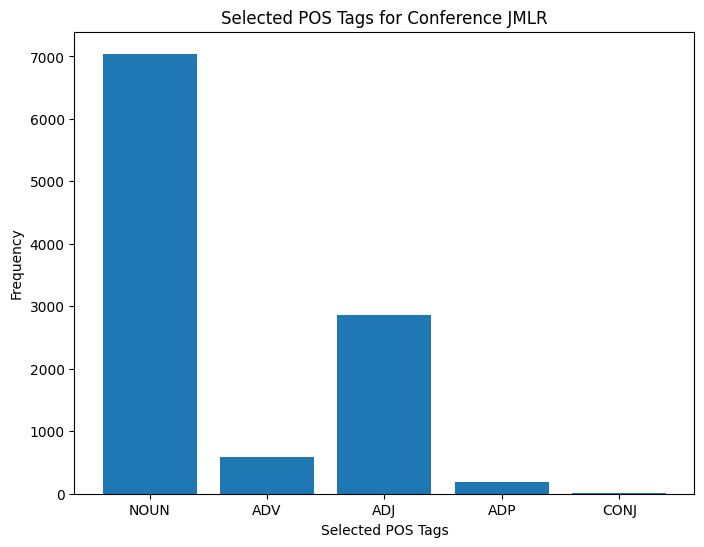

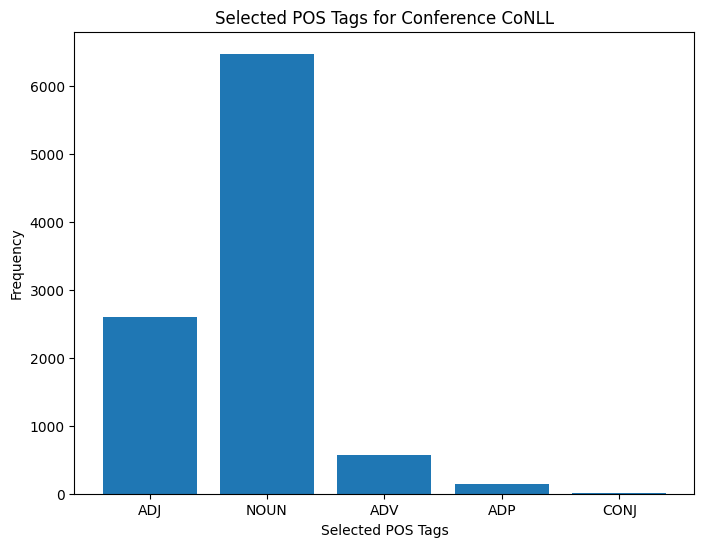

In [17]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from collections import Counter

# Download NLTK resources for POS tagging
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')


# Function to perform POS tagging on text
def pos_tagging(text):
    tokens = nltk.word_tokenize(text)  # Tokenize the text into words
    pos_tags = nltk.pos_tag(tokens, tagset='universal')   # Perform POS tagging with Universal tagset
    return pos_tags

# Define the selected POS tags
plot_tags = ['ADJ', 'ADP', 'ADV', 'CONJ', 'NOUN']

# Apply POS tagging function to each row in the 'Text' column based on unique conferences
unique_conferences = df_visualize['conference'].unique()

for con in unique_conferences:
    text_combined = ' '.join(df_visualize[df_visualize['conference'] == con]['Text'].astype(str))
    pos_tags = pos_tagging(text_combined)

    # Count selected POS tags
    pos_counter = Counter(tag for word, tag in pos_tags if tag in plot_tags)

    if len(pos_counter) > 0:
        tags, counts = zip(*pos_counter.items())

        # Plot selected POS tags for the current conference
        plt.figure(figsize=(8, 6))
        plt.bar(tags, counts)
        plt.title(f'Selected POS Tags for Conference {con}')
        plt.xlabel('Selected POS Tags')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"No instances found for selected POS tags in conference {con}")


**Top 10 High Frequency words for each year**

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Initialise the count vectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=1, max_features=5000)


# Define an empty dictionary
word_table = {}

for year in df_visualize['year'].unique():
    for con in df_visualize['conference'].unique():
        # Apply the count vectorized method to the cleaned data with label 1
        tf = tf_vectorizer.fit_transform(df_visualize.loc[(df_visualize['conference'] == con) & (df_visualize['year'] == year), 'Text'])

        # Get the top 10 words
        tf_feature_names = tf_vectorizer.get_feature_names_out()
        sums = tf.sum(axis=0)
        data = []
        for col, term in enumerate(tf_feature_names):
            data.append((term, sums[0, col]))

        ranking = pd.DataFrame(data, columns=['term', 'count'])
        top_words = ranking.sort_values('count', ascending=False).head(10)['term'].tolist()

        # Add the top 10 words to the word_table dictionary
        if year not in word_table:
            word_table[year] = {}
        word_table[year][con] = top_words

# Create a DataFrame from the word_table dictionary
word_table_df = pd.DataFrame.from_dict(word_table, orient='index')

# Display the table
print(word_table_df)




                                                                                              EMNLP  \
2013.0               [model, method, data, approach, present, system, propose, two, also, evaluate]   
2014.0            [model, method, word, approach, feature, paper, present, based, result, baseline]   
2015.0               [model, approach, report, method, train, entity, result, also, two, introduce]   
2016.0              [present, approach, study, paper, system, work, model, explore, language, text]   
2017.0         [model, approach, method, result, present, language, word, report, learning, system]   
2018.0               [model, word, method, approach, baseline, task, result, using, propose, train]   
2019.0  [model, method, baseline, approach, train, set, introduce, performance, sentence, evaluate]   
2020.0               [model, method, report, data, result, propose, also, dataset, training, train]   
2021.0                   [model, method, train, also, evaluate, work, two

**Top 10 words in each document based on Tf-IDF**

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Instantiate and fit TfidfVectorizer
tr_idf_model = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(df_visualize['Text'])

# Get feature names
words_set = tr_idf_model.get_feature_names_out()

# Get TF-IDF array
tf_idf_array = tf_idf_vector.toarray()

# Create DataFrame with TF-IDF values
df_tf_idf = pd.DataFrame(tf_idf_array, columns=words_set)

# Get top N features for each document
top_n = 10  # Number of top features to retrieve
top_features = df_tf_idf.apply(lambda x: x.sort_values(ascending=False).head(top_n).index.tolist(), axis=1)

# Display top N features for each document
print(top_features)


0                                                  [sep, arate, coreferenceannotated, anaphora, anaphoric, ral, neu, link, requiring, competitive]
1                                                               [bootstrap, tmi, ping, solving, jointly, contribution, system, task, two, present]
2                                                                       [ric, tac, met, rouge, lin, posed, pro, summarization, standard, evaluate]
3                                       [pagerankbased, yang, proposed, use, approach, preferably, predictor, predicts, predictsfor, preestimated]
4                                                                      [pmi, wapmi, pointwise, schneider, thomas, tual, ture, classic, fea, cover]
                                                                           ...                                                                    
2995                                      [generalization, sameway, othersto, distilbert, hate, identity, classificati

**Printing Unigrams, Bigrams, Trigrams**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def print_ngrams(df, n):
    # Tokenize unigrams, bigrams, and trigrams
    vectorizer = CountVectorizer(ngram_range=(n, n))  # Specify the n-gram range as a tuple
    X = vectorizer.fit_transform(df)

    # Get feature names (n-grams)
    feature_names = vectorizer.get_feature_names_out()

    # Create a DataFrame to count occurrences of n-grams
    count_df = pd.DataFrame(X.todense(), columns=feature_names)

    # Sum the occurrences of each n-gram across all documents
    total_count = count_df.sum(axis=0)

    # Get top 10 n-grams
    top_ngrams = total_count.nlargest(10)

    print(f"Top 10 {n}-grams:\n{top_ngrams}")


print_ngrams(df_visualize['Text'], 1)

print_ngrams(df_visualize['Text'], 2)

print_ngrams(df_visualize['Text'], 3)



Top 10 1-grams:
model       612
method      546
approach    407
result      373
section     281
present     272
data        238
propose     222
also        214
set         190
dtype: int64
Top 10 2-grams:
paper propose     49
data set          40
neural network    36
report result     36
test set          33
paper present     28
train model       26
language model    24
training data     24
baseline model    21
dtype: int64
Top 10 3-grams:
draw draw draw                     9
fixed fixed fixed                  6
random random random               6
also compare result                5
applied approach generate          5
approach generate propbanks        5
crosslingual dependency parsing    5
future would like                  5
generate propbanks language        5
language group akbik               5
dtype: int64


**Topic-Modeling using LDA**

In [ ]:
from gensim.models import CoherenceModel, LdaModel
from gensim.corpora import Dictionary
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Tokenize the text data
tokenized_data = df_visualize['Text'].apply(lambda x: word_tokenize(str(x)))

# Create a Gensim dictionary from the tokenized data
dictionary = Dictionary(tokenized_data)

# Create a document-term matrix using the dictionary
corpus = [dictionary.doc2bow(text) for text in tokenized_data]

# Function to calculate coherence score for a given number of topics
def calculate_coherence_score(corpus, dictionary, texts, num_topics):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, iterations=200)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Try different numbers of topics and calculate coherence scores
min_topics = 2
max_topics = 20
step_size = 1

topic_range = range(min_topics, max_topics + 1, step_size)
coherence_scores = []

for num_topics in topic_range:
    coherence_score = calculate_coherence_score(corpus, dictionary, tokenized_data, num_topics)
    coherence_scores.append(coherence_score)

# Find the optimal number of topics based on the coherence scores
optimal_num_topics = topic_range[coherence_scores.index(max(coherence_scores))]

# Print the coherence scores and the optimal number of topics
print("Coherence scores for different numbers of topics:")
for i, score in enumerate(coherence_scores):
    print(f"Num Topics: {topic_range[i]}  -  Coherence Score: {score}")

print(f"\nOptimal number of topics: {optimal_num_topics}")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Horizontal Bar-Plot for LDA topic visualization**

In [ ]:
# Build the LDA model with the optimal number of topics
lda_model_optimal = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, passes=10, iterations=200)

import matplotlib.pyplot as plt

def plot_lda_topics(lda_model, num_topics, num_words=10):
    for topic_id in range(num_topics):
        words = lda_model.show_topic(topic_id, topn=num_words)
        topic_words = [word[0] for word in words]
        word_probabilities = [word[1] for word in words]

        plt.figure(figsize=(8, 6))
        plt.barh(topic_words, word_probabilities, color='skyblue')
        plt.xlabel('Word Probability')
        plt.title(f'Topic {topic_id}')
        plt.gca().invert_yaxis()  # Invert y-axis to display most relevant words on top
        plt.show()

# Assuming lda_model_optimal is your LDA model and num_topics is the number of topics in your model
plot_lda_topics(lda_model_optimal, optimal_num_topics)




**Word cloud for LDA Topic Visualization**

In [ ]:
from wordcloud import WordCloud

def plot_wordcloud(lda_model, num_words=10):
    topics = lda_model.show_topics(num_topics=16, num_words=num_words, formatted=False)

    plt.figure(figsize=(16, 16))
    for idx, (topic_id, word_probs) in enumerate(topics):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_probs))
        plt.subplot(4, 4, idx + 1)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topic {topic_id}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Assuming lda_model_optimal is your LDA model and num_topics is the number of topics in your model
plot_wordcloud(lda_model_optimal, num_words=10)




In [ ]:
!pip install bertopic

**Topic-modeling using BERTopic**

In [ ]:
from bertopic import BERTopic

# Initialize BERTopic model
topic_model = BERTopic(language="english", calculate_probabilities=True)  # You can specify the language

# Fit the model to the data
topics, probabilities = topic_model.fit_transform(df_visualize['Text'])

# Get the most frequent topics
top_topics = topic_model.get_topic_freq()

# Print the most frequent topics
print(top_topics)




In [ ]:
print(topic_model.get_topic_info())

In [ ]:

topic_model.get_document_info(df_visualize['Text'])

**Visualizing Intertopic Distance of Topics generated using BERTopic**

In [ ]:
topic_model.visualize_topics()

# Loading the Training Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("research contribution corpus -v2.csv")
df.head()

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df.shape

In [ ]:
df["Label"].value_counts()

In [ ]:
data1 = df.copy()

In [ ]:
data1.head()

In [ ]:
# Assuming your DataFrame is named df
data1.rename(columns={'Sentence': 'Text'}, inplace=True)


In [ ]:
data1.head()

In [ ]:
# Print the column names
print(data1.columns)


In [ ]:
data1['Text'] = data1['Text'].apply(remove_url_tags_mentions)

In [ ]:
data1['Text'] = data1['Text'].apply(remove_punctuations)

In [ ]:
data1['Text'] = data1['Text'].apply(lemmatize_text)

In [ ]:
data1['Text'] = data1['Text'].apply(remove_stopwords_numerics)

In [ ]:
print(data1)

# Split Data

In [ ]:
X =  data1['Text']
y = data1['Label' ]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

In [ ]:
X

In [ ]:
y.unique()

In [ ]:
print("Unique values of original labels:", y.unique())


In [ ]:
import numpy as np

# Label Encoding the Object Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Print unique encoded labels
print("Unique encoded labels:", np.unique(y_train_encoded))



In [ ]:
# Print unique labels and their encoded values
unique_labels = label_encoder.classes_
encoded_values = np.unique(y_train_encoded)

print("Unique labels:", unique_labels)
print("Encoded values:", encoded_values)

# Check the range of encoded labels
min_encoded_value = np.min(encoded_values)
max_encoded_value = np.max(encoded_values)

print(f"Min encoded value: {min_encoded_value}, Max encoded value: {max_encoded_value}")


# Training the SciBERT model

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
import torch
import torch.nn.functional as F

# Load SciBERT tokenizer and model:
tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")
model = AutoModelForSequenceClassification.from_pretrained("allenai/scibert_scivocab_uncased", num_labels=6)

# Tokenize and pad input data:
def tokenize_and_pad(texts, max_len=512):
    input_ids = []
    attention_masks = []

    for text in tqdm(texts, desc="Tokenizing"):
        inputs = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids.append(inputs['input_ids'])
        attention_masks.append(inputs['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tokenize and pad the input data
X_train_input_ids, X_train_attention_masks = tokenize_and_pad(X_train.astype(str))
X_test_input_ids, X_test_attention_masks = tokenize_and_pad(X_test.astype(str))

# Create DataLoader for SciBERT inputs:
batch_size = 10
train_dataset = TensorDataset(X_train_input_ids, X_train_attention_masks, torch.tensor(y_train_encoded, dtype=torch.long))
test_dataset = TensorDataset(X_test_input_ids, X_test_attention_masks, torch.tensor(y_test_encoded, dtype=torch.long))
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Fine-tune SciBERT model:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}"):
        input_ids, attention_masks, labels = [tensor.to(device) for tensor in batch]

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}, Average Training Loss: {average_loss}")



In [ ]:
# Save the fine-tuned SciBERT model
model.save_pretrained("my_project_SciBERT_model")
# Save the tokenizer as well
tokenizer.save_pretrained("my_project_SciBERT_model")


# Model Evaluation

In [ ]:
'''
# Evaluate the model on the test set
model.eval()
all_predictions = []
all_true_labels = []

for batch in tqdm(test_dataloader, desc="Evaluating"):
    input_ids, attention_masks, labels = [tensor.to(device) for tensor in batch]

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)

    predictions = torch.argmax(outputs.logits, dim=1).cpu().numpy()
    true_labels = labels.cpu().numpy()

    all_predictions.extend(predictions)
    all_true_labels.extend(true_labels)

# Decode the predicted and true labels
predicted_labels = label_encoder.inverse_transform(all_predictions)
true_labels = label_encoder.inverse_transform(all_true_labels)

# Print accuracy and classification report
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

classification_rep = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", classification_rep)
'''

In [ ]:

# Evaluate the model on the test set
model.eval()
all_predictions = []
all_true_labels = []

for batch in tqdm(test_dataloader, desc="Evaluating"):
    input_ids, attention_masks, labels = [tensor.to(device) for tensor in batch]

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_masks)

    predictions = torch.argmax(outputs.logits, dim=1).cpu().numpy()
    true_labels = labels.cpu().numpy()

    all_predictions.extend(predictions)
    all_true_labels.extend(true_labels)

# Decode the predicted and true labels
predicted_labels = label_encoder.inverse_transform(all_predictions)
true_labels = label_encoder.inverse_transform(all_true_labels)


### Evalution Metrics

In [ ]:
# Print accuracy and classification report
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
classification_rep = classification_report(true_labels, predicted_labels)
print("Classification Report:\n", classification_rep)

# Evalauting the SciBERT Model on Extracted Contributions

In [ ]:
selected_rows.head()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader

# Tokenize and pad the input data for selected_rows
selected_rows_input_ids, selected_rows_attention_masks = tokenize_and_pad(selected_rows['Text'].astype(str))

# Create DataLoader for SciBERT inputs:
selected_rows_dataset = TensorDataset(selected_rows_input_ids, selected_rows_attention_masks)
selected_rows_dataloader = DataLoader(selected_rows_dataset, batch_size=batch_size, shuffle=False)

# Make predictions on the unknown data
model.eval()
predictions = []

with torch.no_grad():
    for batch in tqdm(selected_rows_dataloader, desc="Predicting"):
        input_ids, attention_masks = [tensor.to(device) for tensor in batch]

        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits

        # Assuming the model predicts class probabilities, you can use argmax to get the predicted class
        predicted_class = torch.argmax(F.softmax(logits, dim=1), dim=1)

        predictions.extend(predicted_class.cpu().numpy())

# Decode the predicted labels
predicted_labels = label_encoder.inverse_transform(predictions)

# Add the predicted labels to the selected_rows DataFrame
selected_rows['Predicted_Label'] = predicted_labels

# Now, selected_rows DataFrame contains the original text along with the predicted labels
print(selected_rows[['Text', 'Predicted_Label']])


In [ ]:
selected_rows[['Text', 'Predicted_Label']]

### Using saved model for predictions

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
import torch
import torch.nn.functional as F
import pandas as pd

# Load the saved SciBERT model and tokenizer
saved_model_path = "my_project_SciBERT_model"
loaded_model = AutoModelForSequenceClassification.from_pretrained(saved_model_path)
loaded_tokenizer = AutoTokenizer.from_pretrained(saved_model_path)

# Tokenize and pad the input data for selected_rows
selected_rows_input_ids, selected_rows_attention_masks = tokenize_and_pad(selected_rows['Text'].astype(str), max_len=512)

# Create DataLoader for SciBERT inputs:
selected_rows_dataset = TensorDataset(selected_rows_input_ids, selected_rows_attention_masks)
selected_rows_dataloader = DataLoader(selected_rows_dataset, batch_size=batch_size, shuffle=False)


# Set the device - either 'cuda' for GPU or 'cpu' for CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the loaded_model to the desired device
loaded_model = loaded_model.to(device)

predictions = []

with torch.no_grad():
    for batch in tqdm(selected_rows_dataloader, desc="Predicting"):
        input_ids, attention_masks = [tensor.to(device) for tensor in batch]

        outputs = loaded_model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits

        # Assuming the model predicts class probabilities, you can use argmax to get the predicted class
        predicted_class = torch.argmax(F.softmax(logits, dim=1), dim=1)

        predictions.extend(predicted_class.cpu().numpy())

# Decode the predicted labels using the label_encoder from training
predicted_labels = label_encoder.inverse_transform(predictions)

# Add the predicted labels to the selected_rows DataFrame
selected_rows['Predicted_Label'] = predicted_labels

# Now, selected_rows DataFrame contains the original text along with the predicted labels
print(selected_rows[['Text', 'Predicted_Label']])



In [ ]:
selected_rows[['Text', 'Predicted_Label']]

In [ ]:
selected_rows["Predicted_Label"].value_counts()

In [ ]:
data1.to_csv('training_contributions.csv', index=False)
selected_rows.to_csv('testing_contributions.csv', index=False)

# **Traning using GPT-2**

In [ ]:
print(data1)

In [ ]:
data1=data1.rename(columns={'Text': 'text', 'Label': 'label'})
print(data1)

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import re
import string
from tqdm.notebook import tqdm
import plotly.express as px
import plotly.graph_objects as go

import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report, accuracy_score
from transformers import (set_seed,
                          TrainingArguments,
                          Trainer,
                          GPT2Config,
                          GPT2Tokenizer,
                          AdamW,
                          get_linear_schedule_with_warmup,
                          GPT2ForSequenceClassification)

dataset = data1

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming selected_rows is your DataFrame and 'conference' is the column to be encoded
encoder = LabelEncoder()
dataset['label'] = encoder.fit_transform(dataset['label'])

In [ ]:
print(dataset)

# Train and Test Splitting

In [ ]:
train_dataset = dataset.sample(frac=0.80, random_state=0)
val_dataset = dataset.drop(train_dataset.index)

# Definition of Parameters

In [ ]:

max_len = None # Max lenght of the text for input
batch_size = 32
epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Functions and classes

In [ ]:
# Dataset creator for Pytorch
class Contribution_DatasetCreator(Dataset):
    def __init__(self, processed_data, train):
        self.data = processed_data
        self.train = train

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        line = self.data.iloc[index]
        if self.train:
            return {'text': line['text'], 'label': line['label']}
        else:
            return {'text': line['text'], 'label': 0}

# Class to tokenize and process the text for input to the dataloader
class GPT2_contribution_collator(object):
    def __init__(self, tokenizer, max_seq_len=None):
        self.tokenizer = tokenizer
        self.max_seq_len = max_seq_len
        return

    def __call__(self, sequences):
        texts = [sequence['text'] for sequence in sequences]
        labels = [int(sequence['label']) for sequence in sequences]
        inputs = self.tokenizer(text=texts,
                                return_tensors='pt',
                                padding=True,
                                truncation=True,
                                max_length=self.max_seq_len)
        inputs.update({'labels': torch.tensor(labels)})
        return inputs


def contribution_train(dataloader, optimizer, scheduler, device):
    global model
    model.train()
    predictions = []
    true_labels = []
    total_loss = 0

    for batchs in tqdm(dataloader, total=len(dataloader)):
        true_labels += batchs['labels'].cpu().numpy().flatten().tolist()  # Move to CPU for data retrieval
        batchs = {k: v.to(device) for k, v in batchs.items()}  # Send batchs to device
        optimizer.zero_grad()
        outputs = model(**batchs)
        loss, logits = outputs[:2]
        total_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        predictions += logits.argmax(axis=-1).cpu().numpy().flatten().tolist()  # Move predictions to CPU
        torch.cuda.empty_cache()  # Clear cache to manage memory

    avg_epoch_loss = total_loss / len(dataloader)
    return predictions, true_labels, avg_epoch_loss


# Function for validation
def contribution_validate(dataloader, device):
    global model
    model.eval()
    predictions = []
    true_labels = []
    total_loss = 0

    for batchs in tqdm(dataloader, total=len(dataloader)):
        true_labels += batchs['labels'].numpy().flatten().tolist()
        batchs = {k:v.type(torch.long).to(device) for k,v in batchs.items()}
        with torch.no_grad():
            outputs = model(**batchs)
            loss, logits = outputs[:2]
            total_loss += loss.item()
            predictions += logits.argmax(axis=-1).flatten().tolist()
    avg_epoch_loss = total_loss / len(dataloader)
    return predictions, true_labels, avg_epoch_loss

def contribution_predict(dataloader, device):
    global model
    model.eval()
    predictions = []

    for batchs in tqdm(dataloader, total=len(dataloader)):
        batchs = {k:v.type(torch.long).to(device) for k,v in batchs.items()}
        with torch.no_grad():
            outputs = model(**batchs)
            _, logits = outputs[:2]
            predictions += logits.argmax(axis=-1).flatten().tolist()
    return predictions

# Load GPT-2 Model and Tokenizer

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
print('Loading gpt-2 model')
model_config = GPT2Config.from_pretrained(pretrained_model_name_or_path='gpt2', num_labels=6)

print('Loading tokenizer...')
tokenizer = GPT2Tokenizer.from_pretrained(pretrained_model_name_or_path='gpt2')
tokenizer.padding_side = "left"
tokenizer.pad_token = tokenizer.eos_token

print('Loading model...')
model = GPT2ForSequenceClassification.from_pretrained(pretrained_model_name_or_path='gpt2', config=model_config)
model.resize_token_embeddings(len(tokenizer))
model.config.pad_token_id = model.config.eos_token_id
model.to(device)

In [ ]:
train_dataset

In [ ]:
val_dataset

# Prepare dataloader

In [ ]:
gpt2_collator = GPT2_contribution_collator(tokenizer=tokenizer, max_seq_len=max_len)

train_data = Contribution_DatasetCreator(train_dataset, train=True)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=gpt2_collator)

val_data = Contribution_DatasetCreator(val_dataset, train=True)
val_dataloader = DataLoader(val_data, batch_size=batch_size, shuffle=True, collate_fn=gpt2_collator)

# Train and validate model

In [ ]:
optimizer = AdamW(model.parameters(), lr = 5e-5, eps = 1e-8, weight_decay=0.01)
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)
loss = []
accuracy = []
val_loss_list = []
val_accuracy_list = []

for epoch in tqdm(range(epochs)):
    train_labels, true_labels, train_loss = contribution_train(train_dataloader, optimizer, scheduler, device)
    train_acc = accuracy_score(true_labels, train_labels)
    print('epoch: %.2f train accuracy %.2f' % (epoch, train_acc))
    loss.append(train_loss)
    accuracy.append(train_acc)

    val_labels, val_true_labels, val_loss = contribution_validate(val_dataloader, device)
    val_acc= accuracy_score(val_true_labels, val_labels)
    print('epoch: %.2f validation accuracy %.2f' % (epoch, val_acc))
    val_loss_list.append(val_loss)
    val_accuracy_list.append(val_acc)

In [ ]:
print(selected_rows.head())

In [ ]:
test=selected_rows
test=test.rename(columns={'Text': 'text'})
test.reset_index()
test_dataset = test
test_dataset = Contribution_DatasetCreator(test_dataset, train=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, collate_fn=gpt2_collator)
#pd.Series(predict(test_dataloader, device))

sub_data = test
sub_data['target'] = pd.Series(contribution_predict(test_dataloader, device))
replace_dict={ 0:'Algorithms/ Methods Construction or Optimization', 1:'Applications',2:'Dataset Creation or Resources',3:'Model Construction or Optimization',
              4:'Performance Evaluation',5:'Theory Proposal'}
sub_data['target'] = submission['target'].map(replace_dict)
sub_data.to_csv('sub_data.csv', index=False)
print(sub_data)